# <center> Final Project - Handwriting recognition</center>
## <center> Due: Dec 16$^{th}$ 11:59 PM</center>

Handwriting recognition is a well-studied subject in computer vision and has found wide applications in our daily life (such as USPS mail sorting). In this project, we will explore various machine learning techniques for recognizing handwriting digits. The dataset you will be using is the well-known MINST dataset.
(1)	The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. (http://yann.lecun.com/exdb/mnist/)
Below is an example of some digits from the MNIST dataset.
 
The goal of this project is to build a 10-class classifier to recognize those handwriting digits as accurately as you can.  All the assignments below should use the training data (60K examples) and test data (10 K examples) as given by the dataset.
Here are the basic requirements for this project.


### Task #1:
Build a number of non-deep learning based classifiers using all pixels as features for handwriting recognition. You need to use at least three the following six techniques we have learned from the class to do the work: 
•	Logistic Regression
•	SVM
•	Decision tree
•	Random forest
•	XGBoost
•	Neural Network
For each technique, please use your own language to give a general description of the technique, its pros and cons, and why such a technique is suitable for solving the handwriting recognition problem. The goal is to make sure you know why you decide to choose this technique.
Please also make a comparison table among the three techniques as well as the method from Task #1 above.


### Task #2: 

In this assignment, we will explore various techniques related to neural network with hidden layers more than 3 or CNN to solve the 10-class classification problem.
Since there are many existing implementations to solve the MINST problem, we need to give some twists to this problem to make it worthwhile to do for our final project. (Please refer to the ranking list for MNIST at http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html.)
The basic network structure that we are trying to explore is something like the following (i.e., the fully connected deep neural nets). The number of hidden layers and the size of each hidden layer in terms of neurons are left as tuning parameters that you can explore.


### Task #3:
This assignment reflects the data collection process. Everyone is required to 
•	Hand write 5 styles of your own digits from 0 to 9 on a paper, and make sure your own handwritings are for sure recognizable by yourself. Please take a picture of each digit you write (so you have total 5 x 10 = 50 images), resize and convert it to the same data input format as the MNIST dataset. In other words, you have 50 new data points with labels.
•	Treat these 50 images as “brand-new” test dataset and run your own ML models from Task #1 - #3 on these 50 images and report the achieved test accuracy. Note, the goal for this exercise is not for achieving “high” accuracy, but to show what potential gaps there may be between existing MNIST dataset and your own test dataset, a scenario you would encounter in real life.


### Submission:
In your report (not formal) and submission, the following is required for this assignment 
•	Show all 50 images you create with the corresponding labels you intend to assign, 
•	Make a table to show the test accuracy on these 50 images for each ML model you obtained from Task #1 to #3
•	Submit in a subfolder with your 50 handwriting dataset in MNIST format. 
 

#### Task #1

In [3]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.5.1-py3-none-win_amd64.whl (106.6 MB)


In [9]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from PIL import Image
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm

In [7]:
# Load data set
(trainX, trainy), (testX, testy) = mnist.load_data()

nsamples, nx, ny = trainX.shape
X_d2_train_dataset = trainX.reshape((nsamples,nx*ny))

nsamples, nx, ny = testX.shape
X_d2_test_dataset = testX.reshape((nsamples,nx*ny))


In [8]:
#Logistic Regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_d2_train_dataset, trainy)
lr_train_score = lr_model.score(X_d2_train_dataset, trainy)
lr_test_score = lr_model.score(X_d2_test_dataset, testy)
print(lr_train_score)
print(lr_test_score)

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9339166666666666
0.9255


In [11]:
#SVM
svm_model = svm.LinearSVC()
svm_model.fit(X_d2_train_dataset,trainy)
svm_train_score = svm_model.score(X_d2_train_dataset, trainy)
svm_test_score = svm_model.score(X_d2_test_dataset, testy)
print(svm_train_score)
print(svm_test_score)

0.87725
0.8689


C:\Users\caleb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
#XGB
xgb = XGBClassifier(objective='multiclass:softmax', 
	n_estimators = 325,
	learning_rate = 0.1,
	max_depth = 1
	)

xgb.fit(X_d2_train_dataset,trainy)
predict = xgb.predict(X_d2_train_dataset)
xgb_train_score = sum(predict == trainy)/len(trainy)
print(xgb_train_score)
predict = xgb.predict(X_d2_test_dataset)
xgb_test_score = sum(predict == testy)/len(testy)
print(xgb_train_score)

C:\Users\caleb\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8926333333333333
0.8926333333333333


#### Task #2

In [22]:
from tensorflow.python.keras.layers.core import Dense, Dropout
from tensorflow.keras import Model, layers
import tensorflow as tf
import math

class CNN_class(Model):
    def __init__(self):
        super(CNN_class, self).__init__()
        # Define the first convolutional layer
        #W_conv1, b_conv1 = create_layer([5, 5, 1, 32])
        # Convolve the image with weight tensor, add the
        # bias, and then apply the ReLU function
        #h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)
        self.conv1 = layers.Conv2D(32, 5, activation=tf.nn.relu)

        # Apply the max pooling operator
        #h_pool1 = max_pooling(h_conv1)
        self.h_pool1 = layers.MaxPool2D(2,2)

        # Define the second convolutional layer
        #W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

        # Convolve the output of previous layer with the
        # weight tensor, add the bias, and then apply
        # the ReLU function
        #h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)
        self.h_conv2 = layers.Conv2D(64, 3, activation=tf.nn.relu)

        # Apply the max pooling operator
        #h_pool2 = max_pooling(h_conv2)
        self.h_pool2 = layers.MaxPool2D(2,2)
        # Define the fully connected layer
        #W_fc1, b_fc1 = create_layer([7 * 7 * 64, 1024])
        self.fc1 = layers.Dense(1024)
        self.flatten = layers.Flatten()
        self.dropout = Dropout(0.5)
        self.out = layers.Dense(10)

    def layer1(self,X):
        X = self.conv1(X)
        X = self.h_pool1(X)
        return X

    def layer2(self,X):
        X = self.h_conv2(X)
        X = self.h_pool2(X)
        return X
    def getOutputLayer(self,X):
        X = self.flatten(X)
        X = self.fc1(X)
        X = self.dropout(X, True)
        X = self.out(X)
        return X
    def runNetwork(self,X):
        X = tf.reshape(X, [-1, 28, 28, 1])
        X = self.layer1(X)
        X = self.layer2(X)
        X = self.getOutputLayer(X)
        return X
    def predict(self,X):
        return tf.nn.softmax(self.runNetwork(X))
        
def accuracy(y_pred, y_acc):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    predict = tf.argmax(y_pred, 1)
    predict = np.array(predict)
    actual = np.array(y_acc)
    acc = (actual == predict).sum()/len(actual)
    return acc

def CNN(X_train, Y_train, X_test, Y_test):
    
    # The images are 28x28. Create the input layer
    #x = tf.placeholder(tf.float32, [None, 784])
    ## UPDATING FOR TENSORFLOW2
    
    conv2 = layers.Conv2D(64, 3)
    pool1 = layers.MaxPool2D(2,2)
    pool2 = layers.MaxPool2D(2,2)
    flatten = layers.Flatten()
    fc1 = Dense(1024)
    dropout = Dropout(0.5)
    out = layers.Dense(10)
    # Reshape 'x' into a 4D tensor
    #x_image = tf.reshape(x, [-1, 28, 28, 1])

    
    # Reshape the output of the previous layer
    #h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function * Use "tf.matmul" for matrix multiplication
    #h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    #keep_prob = tf.placeholder(tf.float32)
    #h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob )

    # Define the readout layer (output layer)
    #W_fc2, b_fc2 = create_layer([1024, 10])
    #y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    # Define the entropy loss and the optimizer
    #y_loss = tf.placeholder(tf.float32, [None, 10])
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_loss))
    #optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)
    optimizer = tf.optimizers.Adam(1e-4)
    # Define the accuracy computation
    #predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    #accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    #sess = tf.InteractiveSession()
    #init = tf.initialize_all_variables()
    #sess.run(init)
    CNN = CNN_class()
    # Start training
    batch_size = 75
    num_iterations = math.ceil(X_train.shape[0] / batch_size)
    start = 0
    end = batch_size
    print('\nTraining the model....')
    for i in range(num_iterations):
        #batch_X = X_train[start:end] 
        #batch_X = np.reshape(batch_X, (-1, 28, 28, 1))
        #batch_y = Y_train[start:end]
        #batch_y = np.reshape(batch_y, (-1, 28, 28, 1))
        batch = (X_train[start:end], Y_train[start:end])
        start = end
        end = min(end + batch_size, X_train.shape[0])

        batch_x = tf.convert_to_tensor(batch[0])
        batch_y = tf.convert_to_tensor(batch[1])
        batch_y = tf.cast(batch_y, tf.int64)
        
        with tf.GradientTape() as gradient:
            results = CNN.runNetwork(batch_x)
            loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=results, labels=batch_y))
        tv = CNN.trainable_variables
        opt_params = gradient.gradient(loss, tv)
        changes = zip(opt_params, tv)
        optimizer.apply_gradients(changes)

        # Print progress
        if i % 50 == 0:
            prediction_y = CNN.predict(batch_x)
            a = accuracy(prediction_y, batch_y)
            print(f"Step: {i}, accuracy: {a}")
            x=3
    # Compute accuracy using test data
    batch_x = tf.convert_to_tensor(X_test)
    batch_y = tf.convert_to_tensor(Y_test)
    batch_y = tf.cast(batch_y, tf.int64)
    test_accuracy = accuracy(CNN.predict(batch_x), batch_y)
    print('Test accuracy =', test_accuracy)
    
    return [test_accuracy, CNN]

In [23]:
trainX_cnn = np.array(trainX, np.float32)/255.0
testX_cnn = np.array(testX, np.float32)/255.0
[test_score, model] = CNN(trainX_cnn, trainy, testX_cnn, testy)


Training the model....
Step: 0, accuracy: 0.18666666666666668
Step: 50, accuracy: 0.7066666666666667
Step: 100, accuracy: 0.8133333333333334
Step: 150, accuracy: 0.8666666666666667
Step: 200, accuracy: 0.92
Step: 250, accuracy: 0.9333333333333333
Step: 300, accuracy: 0.8666666666666667
Step: 350, accuracy: 0.9466666666666667
Step: 400, accuracy: 0.9066666666666666
Step: 450, accuracy: 0.92
Step: 500, accuracy: 0.9066666666666666
Step: 550, accuracy: 0.92
Step: 600, accuracy: 0.9066666666666666
Step: 650, accuracy: 0.96
Step: 700, accuracy: 1.0
Step: 750, accuracy: 0.96
Test accuracy = 0.9633


#### Task #3

In [34]:
#Load my_digits
rootdir = "./my_digits"
my_images = []
for i in range(10):
    print(i)
    for n in range(1,6):
        img = Image.open(f"{rootdir}/{i}/{i}_{n}.png").convert('L')
        display(img)
        arr = np.array(img.getdata(), dtype=np.uint8)
        new_img = np.zeros(shape=(28,28))

        for p in range(28):
            slice = arr[p*28 : p*28+28]
            new_img[p] = slice
        my_images.append(new_img)


my_digitsX = np.array(my_images)
my_digitsX_cnn = np.array(my_digitsX, np.float32)/255.0
my_digitsY = np.array([0]*5+[1]*5+[2]*5+[3]*5+[4]*5+[5]*5+[6]*5+[7]*5+[8]*5+[9]*5, dtype=np.uint8)

nsamples, nx, ny = my_digitsX.shape
X_d2_digits_dataset = my_digitsX.reshape((nsamples,nx*ny))


0


1


2


3


4


5


6


7


8


9


In [38]:
lr_digits_score = lr_model.score(X_d2_digits_dataset, my_digitsY)
svm_digits_score = svm_model.score(X_d2_digits_dataset, my_digitsY)

predict = xgb.predict(X_d2_digits_dataset)
xgb_train_score = sum(predict == my_digitsY)/len(my_digitsY)

prediction = model.predict(my_digitsX_cnn)
cnn_ = accuracy(prediction_y, batch_y)
print(f"LR score: {lr_digits_score}")
print(f"SVM score: {svm_digits_score}")
print(f"XGB score: {xgb_train_score}")

LR score: 0.46
SVM score: 0.4
XGB score: 0.58


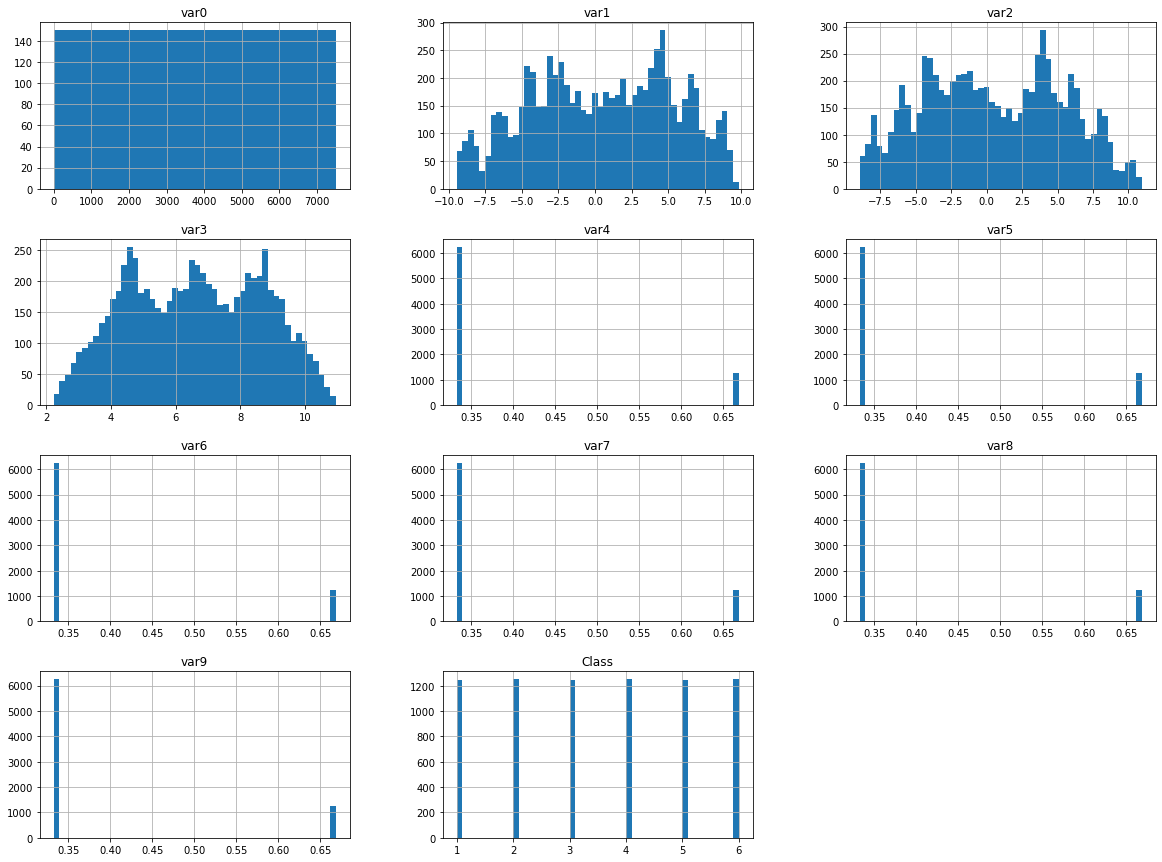

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
var0     0.986013
var9     0.654867
var8     0.392910
var2     0.136978
var7     0.130868
var1    -0.046463
var6    -0.130842
var3    -0.252095
var5    -0.393054
var4    -0.654540
Name: Class, dtype: float64

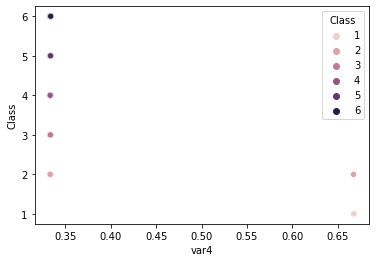

In [11]:
plot_2D(df,'var4', 'Class','Class')

In [12]:
dumm = pd.get_dummies(df.Class)
newdf = df.join(dumm)
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class,1,2,3,4,5,6
var0,1.000000,-0.045948,0.135148,-0.328274,-0.645486,-0.387556,-0.129119,0.129038,0.387307,0.645703,0.986013,-0.645291,-0.387588,-0.129141,0.129058,0.387009,0.645704
var1,-0.045948,1.000000,-0.001150,0.165205,-0.196908,0.160217,0.441620,-0.261986,-0.245783,0.102911,-0.046463,-0.196594,0.160165,0.441862,-0.262022,-0.246323,0.102910
var2,0.135148,-0.001150,1.000000,0.162642,-0.396994,0.210011,0.026827,0.032716,0.371534,-0.243999,0.136978,-0.397491,0.210009,0.027370,0.032702,0.371414,-0.244003
var3,-0.328274,0.165205,0.162642,1.000000,0.285677,-0.285425,0.426891,-0.408041,0.404614,-0.423195,-0.252095,0.285807,-0.285436,0.427051,-0.408050,0.404526,-0.423183
var4,-0.645486,-0.196908,-0.396994,0.285677,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,-0.654540,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.387556,0.160217,0.210011,-0.285425,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.393054,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.129119,0.441620,0.026827,0.426891,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.130842,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,0.129038,-0.261986,0.032716,-0.408041,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,0.130868,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,0.387307,-0.245783,0.371534,0.404614,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,0.392910,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,0.645703,0.102911,-0.243999,-0.423195,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,0.654867,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997


In [13]:
newdf = newdf[['var4','var5','var6','var7','var8','var9',1,2,3,4,5,6]]
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var4,var5,var6,var7,var8,var9,1,2,3,4,5,6
var4,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997
1,0.999518,-0.200041,-0.199869,-0.199979,-0.199933,-0.200016,1.000000,-0.200000,-0.199808,-0.200000,-0.199808,-0.200000
2,-0.199121,0.999997,-0.200106,-0.200185,-0.200085,-0.200194,-0.200000,1.000000,-0.200000,-0.200192,-0.200000,-0.200192
3,-0.199966,-0.199994,0.999517,-0.200008,-0.199887,-0.199995,-0.199808,-0.200000,1.000000,-0.200000,-0.199808,-0.200000
4,-0.200046,-0.200179,-0.199148,0.999997,-0.200099,-0.200152,-0.200000,-0.200192,-0.200000,1.000000,-0.200000,-0.200192


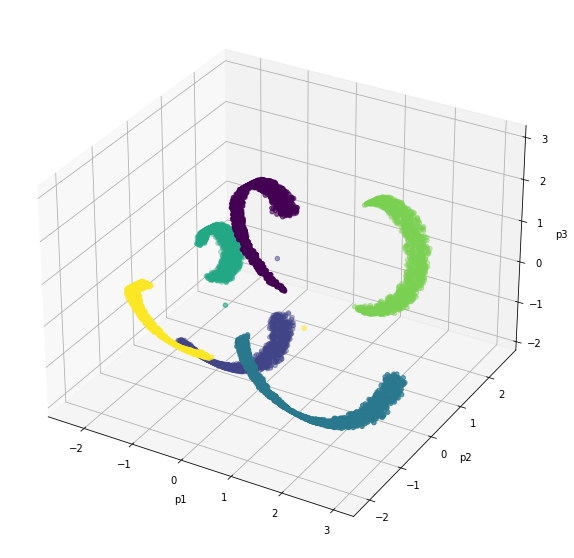

In [14]:
new_df = df[['var1', 'var2', 'var3', 'var4','var5', 'var6', 'var7', 'var8', 'var9']]

std = new_df.loc[:].values
std = StandardScaler().fit_transform(std)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(std)

principalDf = pd.DataFrame(data=principalComponents, columns=['p1', 'p2', 'p3'])
principalDf['target'] = df['Class']
plot_3D(principalDf,'p1','p2','p3','target')

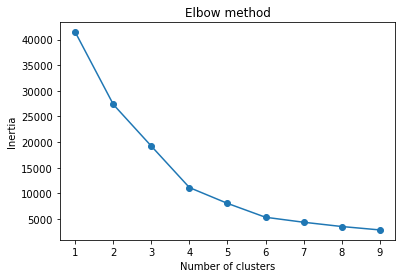

,Inertia
n = 1,41427.656056
n = 2,27337.971047
n = 3,19204.168587
n = 4,11128.148620
n = 5,8044.835428
n = 6,5336.880425
n = 7,4366.694523
n = 8,3533.940513
n = 9,2868.203706


In [15]:
kmeans = KMeans()
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

new_df = principalDf[['p1', 'p2', 'p3']]
plot_inertia(kmeans, new_df, range(1, 10))

##### Model Implementation

In [16]:
##### Model Implementation starts here
kmeans = KMeans()
kmeans.set_params(n_clusters=6)
kmeans.fit(new_df)

km_guess = kmeans.predict(new_df)

##### Summary:

Through EDA, a few important things were found.

First by plotting histograms, it can be seen that var1, var2, and var3 are somewhat normally distributed. It can also be seen that var4, var5, var6, var7, var8, and var9 are 'quasi-categorical' in that they seem to only take on values around 0.33 and 0.66. Finally, the target 'Class' is categorical ranging from 1 through 6.

Second by looking at the correlation to 'Class' on the raw data, it can be seen that the data isn't very useful. This is because we are finding correlation to the numerical values of Class and not necessaraly with the categories themselves. Because of this, it was decided that it would be best to add 'categorical' columns ranging from Class 1 through Class 6 where the column value will indicate whether the data belongs to that class (where 1 indicates it is of the specified class and 0 indicates it is not).

Third, even though there is a very strong correlation between var0 and Class, var0 will not be used since it is simply enumerating the data.

Fourth, the first and second heatmap of correlations shows very strong relationships between var4-var9 and class1-class 6 respectively.

Fifth, by standardizing the features and using PCA, it is possible to cleanly seperate the data by class and then use KMeans to accuratley classify the data using the output of PCA to train it.

Lastly, the elbow graph clearly shows that n=6 is the best number of clusters to use, that is confirmed to be the truth since we already know there are 6 different classes in the data set.

#### Model 2: KNN

##### EDA / Preprocessing

In [17]:
##### EDA / Preprocessing starts here
new_df = df[['var1', 'var2', 'var3']]
def calcK(guess):
    count = 0
    class_guesses = []
    for _ in range(6):
        class_guesses.append(guess[count : count + 1250])
        count += 1250

    tright = 0
    for cg in class_guesses:
        cg = cg.tolist()
        mode = max(set(cg), key=cg.count)
        right = cg.count(mode)
        tright += right
    k = tright / 7500 * 100
    return k

accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(k)
    knn.fit(new_df, df.iloc[:,-1])
    knn_guess = knn.predict(new_df)
    accuracy.append(calcK(knn_guess))
accuracy

[99.96000000000001,
 99.65333333333334,
 99.69333333333333,
 99.64,
 99.58666666666667,
 99.58666666666667,
 99.53333333333333,
 99.53333333333333,
 99.45333333333333,
 99.52,
 99.44,
 99.45333333333333,
 99.45333333333333,
 99.49333333333334,
 99.49333333333334,
 99.49333333333334,
 99.48,
 99.46666666666667,
 99.46666666666667,
 99.42666666666666]

In [18]:
k=500
below95 = False
while not below95:
    knn = KNeighborsClassifier(k)
    knn.fit(new_df, df.iloc[:,-1])
    knn_guess = knn.predict(new_df)
    accuracy = calcK(knn_guess)
    if accuracy < 95:
        break
    k+=1
k

509

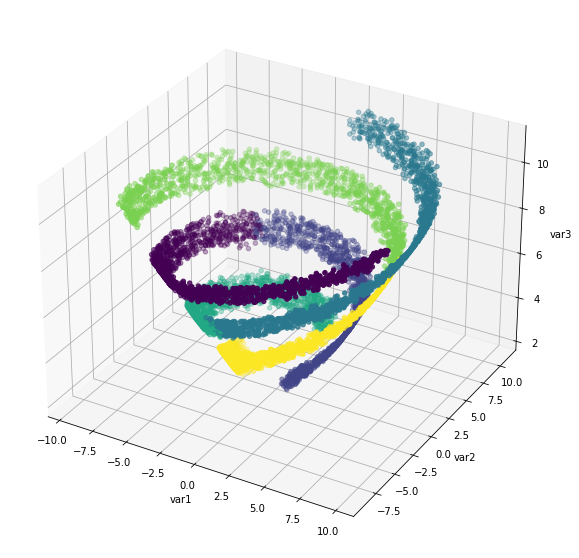

In [19]:
plot_3D(df,'var1','var2','var3','Class')

##### Model Implementation

In [20]:
##### Model Implementation starts here

knn = KNeighborsClassifier(k)
knn.fit(new_df, df.iloc[:,-1])

knn_guess = knn.predict(new_df)

#### Summary:

To avoid coliniarity and to simplify the model, var4-var9 should not be used. Graphing var1-var3 suggests that using those features would be good for KNN and the variables are aproximately normally distributed from the histogram made of all the feautures.

A quick analysis of n_neighbors shows that an n_neighbors=1 is sufficient in achieveing the highest level of accuracy.

It can be seen that a k of 509 drops the accuracy below 95%.

#### Model 3: Logistic Regression

##### EDA / Preprocessing

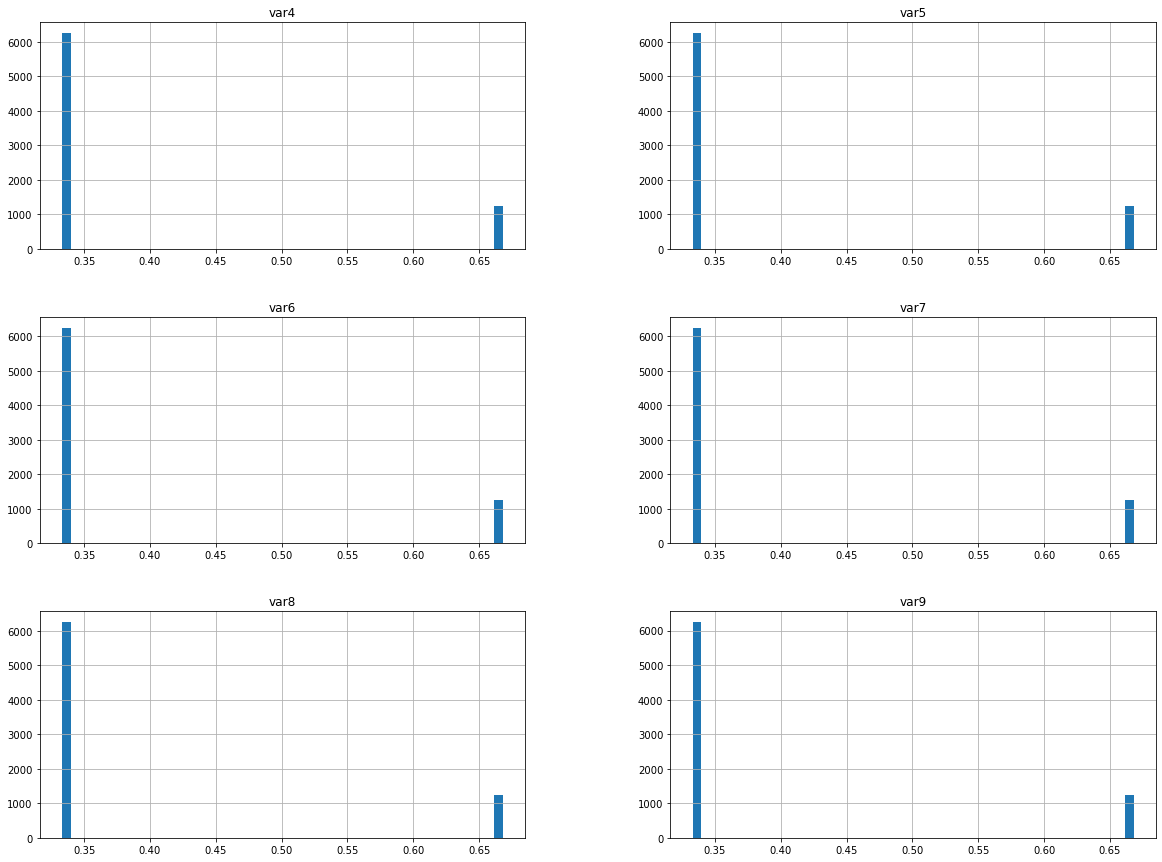

In [21]:
##### EDA / Preprocessing starts here
new_df = df[['var4', 'var5', 'var6', 'var7', 'var8', 'var9']]
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
dumm = pd.get_dummies(df.Class)
newdf = df.join(dumm)
newdf = newdf[['var4','var5','var6','var7','var8','var9',1,2,3,4,5,6]]
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var4,var5,var6,var7,var8,var9,1,2,3,4,5,6
var4,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997
1,0.999518,-0.200041,-0.199869,-0.199979,-0.199933,-0.200016,1.000000,-0.200000,-0.199808,-0.200000,-0.199808,-0.200000
2,-0.199121,0.999997,-0.200106,-0.200185,-0.200085,-0.200194,-0.200000,1.000000,-0.200000,-0.200192,-0.200000,-0.200192
3,-0.199966,-0.199994,0.999517,-0.200008,-0.199887,-0.199995,-0.199808,-0.200000,1.000000,-0.200000,-0.199808,-0.200000
4,-0.200046,-0.200179,-0.199148,0.999997,-0.200099,-0.200152,-0.200000,-0.200192,-0.200000,1.000000,-0.200000,-0.200192


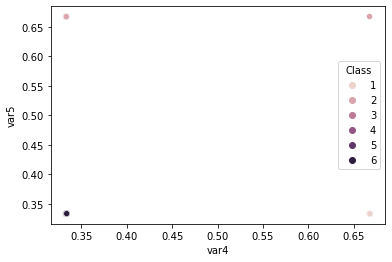

In [23]:
newdf = df[['var4','var5','var6','var7','var8','var9', 'Class']]
plot_2D(df,'var4', 'var5','Class')

##### Model Implementation

In [24]:
##### Model Implementation starts here
new_df = df[['var4', 'var5', 'var6', 'var7', 'var8', 'var9']]
lr = LogisticRegression()
lr.fit(new_df, df.iloc[:,-1])

lr_guess = lr.predict(new_df)

##### Summary:

Based on the analysis done above, var4-var9 was used because of its strong correlation with the target, the fact that it is binary (taking on only the values .33 and .66), the fact that there seems to be no multicollinearity based on the low correlations between the features, the fact that there is a large sample size, and that there are no outliers.

There seems to be independence between observations which is good for this model. There are no extreme outliers.

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [25]:
km_k = calcK(km_guess)
knn_k = calcK(knn_guess)
lr_k = calcK(lr_guess)

Result1 = {'Model Number': [0,1,2], 'Algorithm':['KMeans','KNN','Logistic Regression'],'Number of Features': ['3 (afer PCA)',3,6],
           'Accuracy':[km_k,knn_k,lr_k]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm','Number of Features','Accuracy'])
Result1


,Model Number,Algorithm,Number of Features,Accuracy
0,0,KMeans,3 (afer PCA),99.960000
1,1,KNN,3,94.946667
2,2,Logistic Regression,6,99.960000


All three models were able to perform to very high degrees of accuracy after a combination of EDA, scaling, and feature selection. Features were selected and/or scaled based on the model and the information that was able to be ascertained from EDA.